# Марковская цепь

Це́пь Ма́ркова — последовательность случайных событий с конечным или счётным числом исходов, где вероятность наступления каждого события зависит от состояния, достигнутого в предыдущем событии. Характеризуется тем свойством, что, говоря нестрого, при фиксированном настоящем будущее независимо от прошлого. 

Процесс в каждый момент времени находится в одном из n состояний.
При этом, если он находится в состоянии с номером i, то он перейдет в состояние j с вероятностью pij.

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

## Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [167]:
import pandas as pd
from glob import glob
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
filenames = glob('data/war_and_peace/*.txt')

tom = {}

for i, file in enumerate(filenames):
    file_open = open(file, 'r')
    tom[i] =  file_open.read().lower()
    file_open.close()

In [142]:
import re

text = {}
string = ''

for i in tom:
    text[i] = tom[i].replace('\n', ' ')
    text[i] = re.sub('[^а-яё ]','', text[i])
    text[i] =  ' '.join(text[i].split())
    string += text[i]

In [145]:
string[:100]

'лев толстой война и мир том том часть первая х часть вторая часть третья часть четвертая часть пятая'

In [149]:
Rus_Dict = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(Rus_Dict)}
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32}

In [150]:
#создаем матрицу вероятностей заполненную нулями
probabilities = np.zeros((len(Rus_Dict), len(Rus_Dict)))
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [153]:
for i, j in zip(string[:-1].replace(' ', ''), string[1:].replace(' ', '')):
    probabilities[POS[i], POS[j]] += 1

In [154]:
probabilities

array([[6.3600e+02, 3.4740e+03, 1.2700e+04, ..., 7.9300e+02, 2.0620e+03,
        6.9080e+03],
       [2.6330e+03, 3.6000e+01, 2.4400e+02, ..., 9.5000e+01, 1.1000e+01,
        1.1820e+03],
       [1.5029e+04, 5.9700e+02, 1.0740e+03, ..., 7.2300e+02, 6.0000e+00,
        6.2300e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 9.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6400e+02, 1.3330e+03, 6.6500e+02, ..., 9.8000e+01, 1.0400e+02,
        8.6000e+01],
       [6.3300e+02, 1.2260e+03, 3.7630e+03, ..., 3.9700e+02, 3.2000e+02,
        6.2300e+02]])

In [162]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [165]:
data = pd.DataFrame(probabilities, index=(c for c in Rus_Dict), columns=(c for c in Rus_Dict))
data

,а,б,в,г,д,е,ё,ж,з,и,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.003376,0.018440,0.067412,0.018196,0.037984,0.020962,0.000000,0.018541,0.061972,0.019512,...,0.001614,0.016949,0.019401,0.003461,0.000000,0.000000,0.000000,0.004209,0.010945,0.036668
б,0.065845,0.000900,0.006102,0.000775,0.001701,0.142343,0.000025,0.000525,0.000250,0.050415,...,0.000200,0.001776,0.000350,0.013454,0.006777,0.272507,0.002501,0.002376,0.000275,0.029559
в,0.141206,0.005609,0.010091,0.008625,0.016583,0.115528,0.000009,0.001297,0.015362,0.086590,...,0.000930,0.004773,0.031184,0.000179,0.000338,0.063777,0.004134,0.006793,0.000056,0.005853
г,0.056614,0.001987,0.006072,0.000861,0.066241,0.031531,0.000000,0.000442,0.002363,0.046281,...,0.000132,0.002164,0.000486,0.000000,0.000000,0.000066,0.000110,0.000486,0.000199,0.000420
д,0.165688,0.002681,0.040610,0.002142,0.002383,0.171745,0.000028,0.000780,0.001560,0.099234,...,0.005816,0.002312,0.004936,0.000028,0.006553,0.023404,0.015262,0.000879,0.001660,0.016326
е,0.002370,0.028272,0.044187,0.055789,0.048847,0.027981,0.000011,0.017762,0.024841,0.019261,...,0.003500,0.019789,0.010515,0.008694,0.000000,0.000000,0.000000,0.003584,0.003869,0.006830
ё,0.004926,0.085714,0.076847,0.014778,0.037438,0.030542,0.000000,0.008867,0.030542,0.021675,...,0.000000,0.063054,0.007882,0.000000,0.000000,0.000000,0.000000,0.076847,0.000000,0.001970
ж,0.149182,0.006814,0.002203,0.001999,0.082589,0.411597,0.000000,0.002203,0.000694,0.152242,...,0.000000,0.004815,0.000041,0.000000,0.000000,0.000000,0.004489,0.001224,0.003142,0.000653
з,0.358179,0.014157,0.060382,0.029455,0.050512,0.017379,0.000000,0.011569,0.007129,0.026258,...,0.000584,0.002512,0.001421,0.000076,0.001066,0.038030,0.040669,0.002461,0.004592,0.031992
и,0.004689,0.021709,0.076959,0.018173,0.042316,0.054686,0.000000,0.009615,0.042432,0.036045,...,0.020883,0.030844,0.008110,0.002594,0.000006,0.000000,0.000013,0.003908,0.006124,0.034399


### Матрица переходных вероятностей

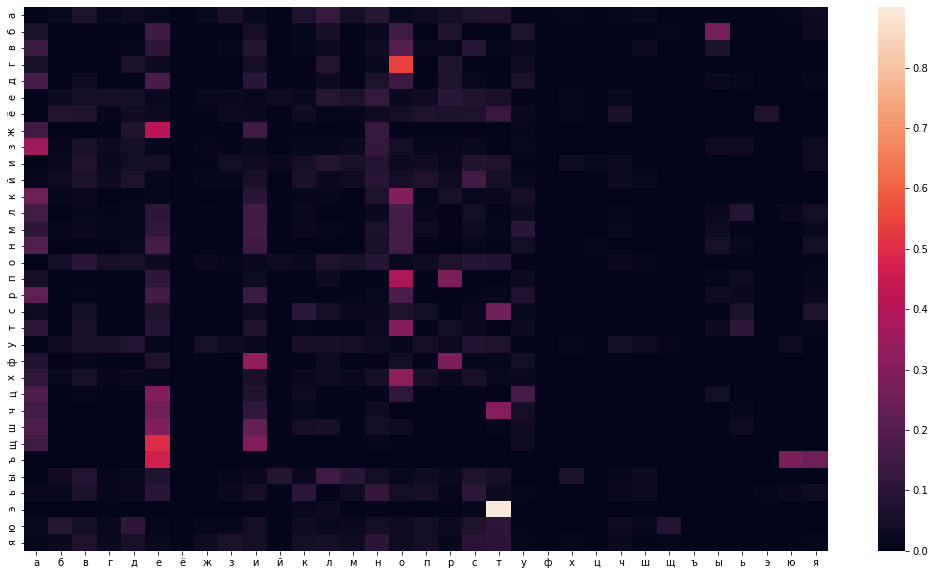

In [171]:
plt.figure(figsize=(18,10))
sns.heatmap(df)
plt.show()

## Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$ Общая вероятность = перемножение всех вероятностей с делением на общее количество

Чем больше данных в выборке, тем точнее вероятность переходов

In [194]:
def cals_string_proba(word):
    proba = 1.0 / 33 #справедливо для бессмысленного набора
    for i, j in zip(word[1:], word[:-1]):
        proba *= probabilities[POS[i], POS[j]]
    return proba

In [195]:
cals_string_proba("привет")

1.1327195373712564e-09

**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р**

In [228]:
start = POS['п']
end = POS['р']

prior = 1. / len(Rus_Dict)
sum_prob = 0
res = {}

for i in Rus_Dict:
    for j in Rus_Dict:
        proba=prior * probabilities[start, POS[i]] * probabilities[POS[j], end]
        if proba > 0:
            #print(''.join(['п', i, j, 'р']), proba)
            res[''.join(['п', i, j, 'р'])] = proba
            
sort_orders = sorted(res.items(), key=lambda x: x[1], reverse=True)            

In [229]:
sort_orders[:5]

[('пофр', 0.0033063830248978828),
 ('попр', 0.003237662978292307),
 ('прфр', 0.0023900178407740822),
 ('прпр', 0.0023403435785457295),
 ('поер', 0.0011558180096713892)]

In [230]:
sort_orders[-5:]

[('пзшр', 2.815359692898042e-10),
 ('пхшр', 2.815359692898042e-10),
 ('пжжр', 2.653838669181771e-10),
 ('пзжр', 2.653838669181771e-10),
 ('пхжр', 2.653838669181771e-10)]

## Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

**Генерация слова начинающегося с буквы “Б” и имеющее длину 8-мь символов**

In [343]:
s = []
start = 'б'
s.append(start)
length = 7

for i in range(length):
    index = POS[start]
    #получаем след символ с любой веростяностью (кроме 0)
    next_char = np.random.choice(list(Rus_Dict), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бхраорыр


## Скрытые марковские модели (HMM)

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых) 
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.


In [259]:
from hmmlearn.hmm import GaussianHMM

In [257]:
data = pd.read_csv('data/international-airline-passengers.csv')
data.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


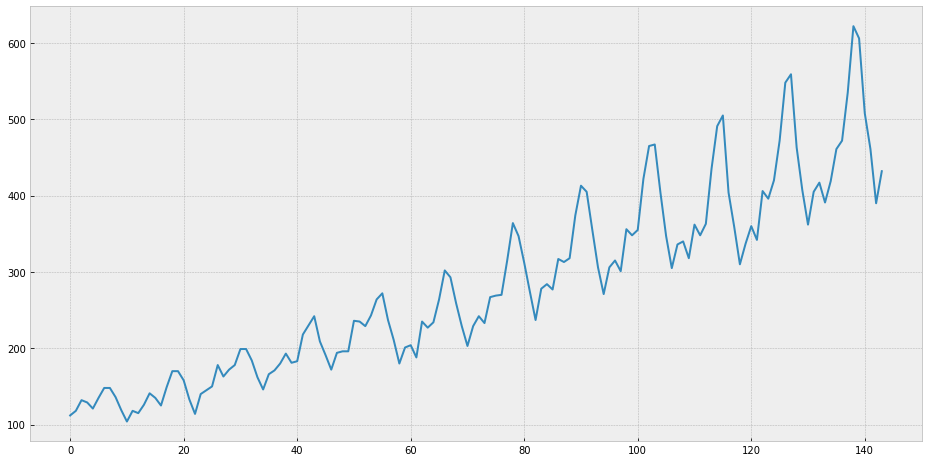

In [261]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(data['Count'])

In [266]:
#перевод серию в матрицу
values = data['Count'].values.reshape(-1,1)

In [270]:
#перебираем количесвто компонентов 
for n in range(1, 14):
    #тип ковариации "diag" (по диагонали) - по болему счету дисперсия
    #1000 раз будет обновлять свои значения с помощью оптимизационных функций
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print(n, model.score(values))#отклонения от предсказаний

1 -893.1837902090575
2 -803.8479638762094
3 -767.0819417008183
4 -743.9977519551936
5 -731.3653439466126
6 -706.6057596024568
7 -694.9948655026278
8 -673.9336800691159
9 -664.246555776613


Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.


10 -656.168431648049
11 -650.2620800745815


Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.


12 -644.963601264357
13 -639.3145851406797


**Поиск скрытых факторов**

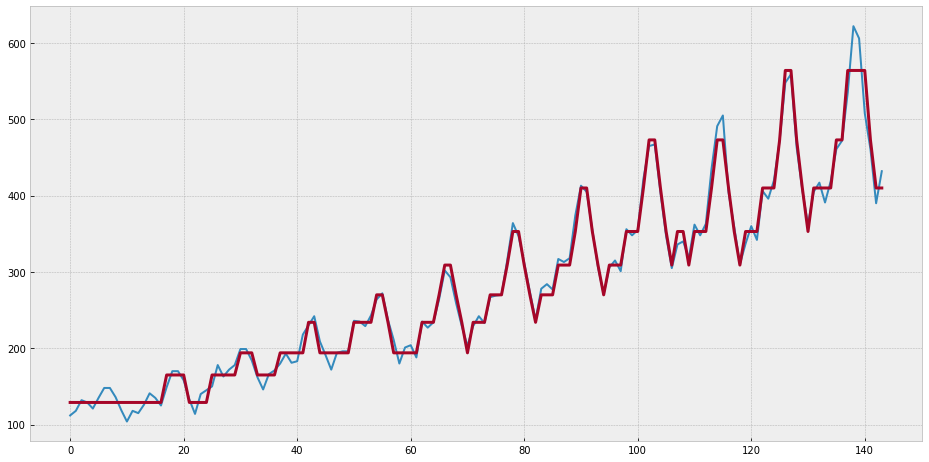

In [283]:
#подобрав 10 значений/компонент (скрытых факторов)
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
#обучаем модель
model.fit(values)

labels = model.predict(values)
means = np.zeros_like(values)

#смотрим какое состояние было в данный момент
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(values)
    plt.plot(means, linewidth=3)

Дискретизация сигнала

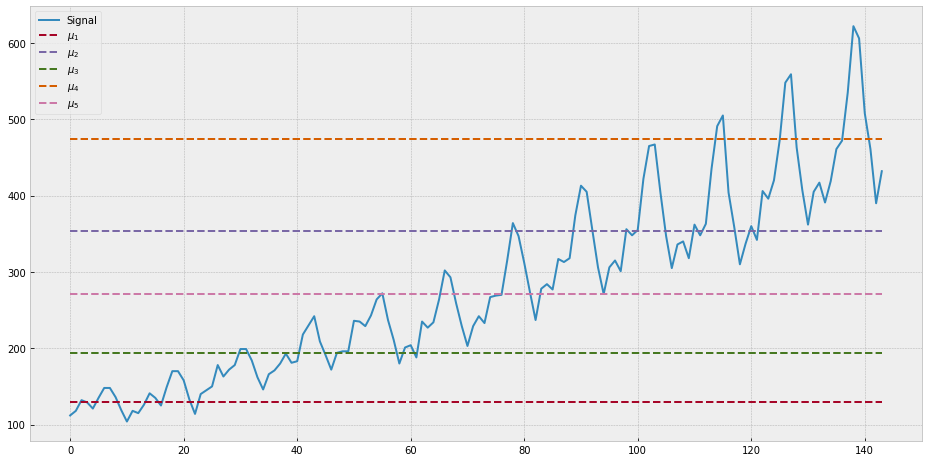

In [301]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    axs = plt.axes()
    _ = axs.plot(values, label='Signal')
    for i in range(5):
        _ = axs.plot(range(len(values)), model.means_[i, 0] * np.ones(len(values)), '--', label='$\mu_{}$'.format(i+1))
    _ = axs.legend()

Пунктирные линии характеризуют среднее значение состояний (скрытые осстояния)

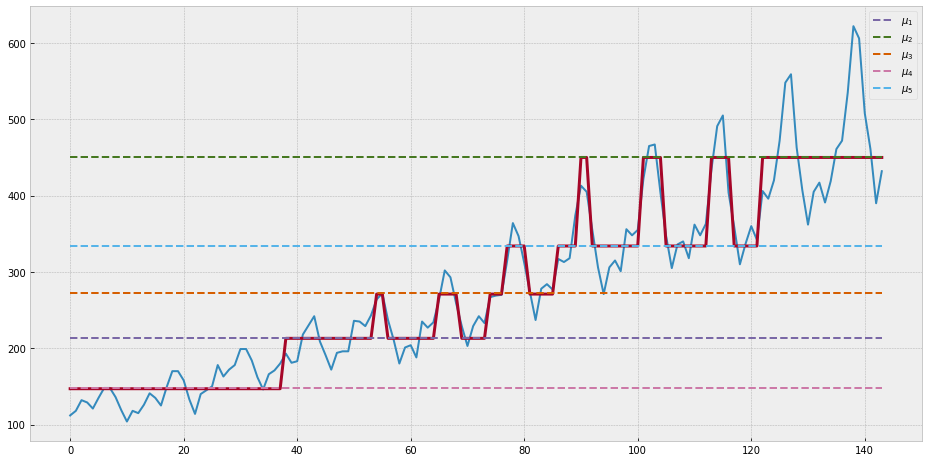

In [346]:
#подобрав 10 значений/компонент (скрытых факторов)
model = GaussianHMM(n_components=5,
                        covariance_type="diag",
                        n_iter=1000)
#обучаем модель
model.fit(values)

labels = model.predict(values)
means = np.zeros_like(values)

#смотрим какое состояние было в данный момент
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    axs = plt.axes() 
    plt.plot(values)
    plt.plot(means, linewidth=3)
    
    for i in range(5):
        _ = axs.plot(range(len(values)), model.means_[i, 0] * np.ones(len(values)), '--', label='$\mu_{}$'.format(i+1))
    _ = axs.legend()
    